In [ ]:
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


In [ ]:
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
dataset = raw_dataset.copy()
# dataset.tail()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# dataset.get('Origin')

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({
    1:'USA',
    2:'Europe',
    3:'Japan'
})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
pd.get_dummies?

In [ ]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,1,0


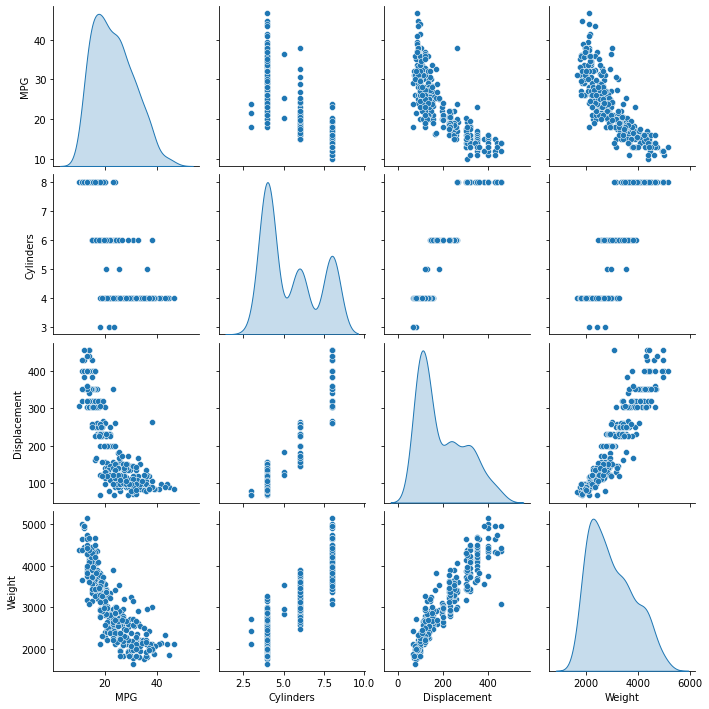

In [ ]:
# sns.pairplot?
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')


In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [ ]:
normalizer = preprocessing.Normalization()

In [ ]:
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
    0.624]


In [ ]:
train_features[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1


In [ ]:
first = np.array(train_features[:1])

In [ ]:
# normalizer.adapt(first)

In [ ]:
print(normalizer.mean.numpy())

[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
    0.624]


In [ ]:
with np.printoptions(precision=2, suppress=True):
  print(first)
  print(normalizer(first).numpy())
  # print(normalizer(second).numpy())

[[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]
[[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [ ]:
second = np.array(train_features[:2])
zero = np.array(train_features[1:2])

In [ ]:
second

array([[   4. ,   90. ,   75. , 2125. ,   14.5,   74. ,    0. ,    0. ,
           1. ],
       [   4. ,  140. ,   88. , 2890. ,   17.3,   79. ,    0. ,    0. ,
           1. ]])

In [ ]:
zero

array([[   4. ,  140. ,   88. , 2890. ,   17.3,   79. ,    0. ,    0. ,
           1. ]])

In [ ]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0


In [ ]:
first = np.array(train_features[:2])

with np.printoptions(precision=2, suppress=True):
  print('First example :', first)
  print()
  print('Normalized :', normalizer(first).numpy())

First example : [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]
 [   4.   140.    88.  2890.    17.3   79.     0.     0.     1. ]]

Normalized : [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]
 [-0.87 -0.53 -0.44 -0.12  0.63  0.85 -0.47 -0.5   0.78]]


In [ ]:
# ini untuk menormalisasikan data horsepower
horsepower = np.array(train_features['Horsepower'])

horsepower_normalization = preprocessing.Normalization(input_shape=[1,])
horsepower_normalization.adapt(horsepower)

In [ ]:
# create NN dengan output berupa 1 node
# (input ternormalisasi) -> (output)
horsepower_model = keras.Sequential([horsepower_normalization,
                                     keras.layers.Dense(units=1)])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
horsepower_model.predict(horsepower[:10])

array([[ 0.522],
       [ 0.295],
       [-0.964],
       [ 0.732],
       [ 0.662],
       [ 0.26 ],
       [ 0.785],
       [ 0.662],
       [ 0.173],
       [ 0.295]], dtype=float32)

In [ ]:
type(horsepower_model)
keras.Sequential.predict?

In [ ]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'], 
    train_labels, 
    epochs=100,
    verbose=0, 
    validation_split=0.2
)

CPU times: user 2.39 s, sys: 113 ms, total: 2.5 s
Wall time: 2.33 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.808088,4.165771,95
96,3.803137,4.178464,96
97,3.806701,4.204453,97
98,3.804236,4.208185,98
99,3.802233,4.184715,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

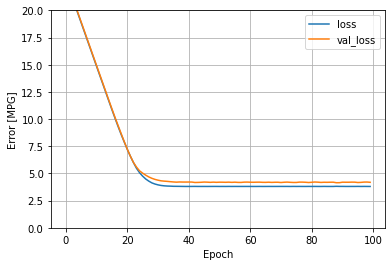

In [ ]:
plot_loss(history)

In [ ]:
test_result = {}

test_result['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [ ]:
horsepower_model.predict?

In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()


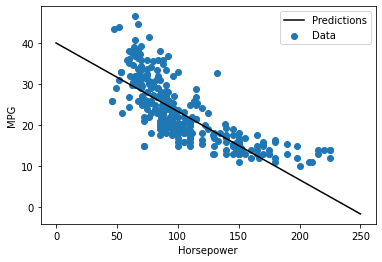

In [ ]:
plot_horsepower(x, y)

In [ ]:
linear_model = tf.keras.Sequential([
                                    normalizer,
                                    layers.Dense(units=1)
])

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.755],
       [-0.182],
       [-0.657],
       [ 0.236],
       [-0.654],
       [-0.492],
       [-0.142],
       [-0.728],
       [-0.501]], dtype=float32)>

In [ ]:
linear_model.predict(train_features[:10])

array([[ 1.658],
       [ 0.232],
       [-0.888],
       [ 0.719],
       [-0.633],
       [-0.606],
       [-0.736],
       [ 0.155],
       [ 0.038],
       [-0.255]], dtype=float32)

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
%%time
new_history = linear_model.fit(
    train_features, train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 2.22 s, sys: 129 ms, total: 2.34 s
Wall time: 2.06 s


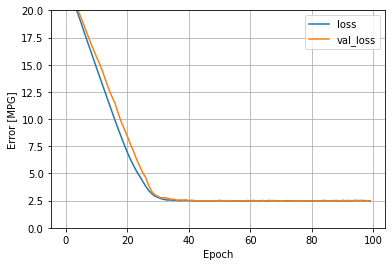

In [ ]:
plot_loss(new_history)

In [ ]:
test_result['linear_mode'] = linear_model.evaluate(
    test_features, test_labels, verbose=0
)

In [ ]:
# bentuk layer : (input_norm) -> (64 hidden layer) -> (64 hidden layer) -> (single output)
def build_and_compile_model(norm):
  model = keras.Sequential([
                            norm,
                            layers.Dense(64, activation='relu'),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalization)

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0,
    epochs=100
)

CPU times: user 2.55 s, sys: 157 ms, total: 2.71 s
Wall time: 2.38 s


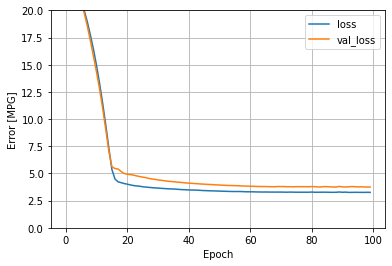

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

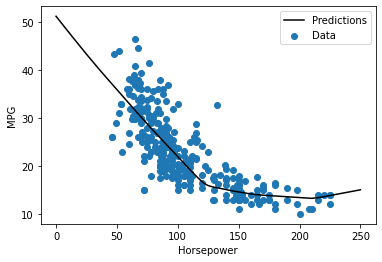

In [ ]:
plot_horsepower(x, y)

In [ ]:
test_result['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], 
    test_labels,
    verbose=0
)

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
%%time
history=dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=2,
    epochs=1000
)

Epoch 1/1000
8/8 - 0s - loss: 22.2334 - val_loss: 22.2043
Epoch 2/1000
8/8 - 0s - loss: 21.3883 - val_loss: 21.2263
Epoch 3/1000
8/8 - 0s - loss: 20.3794 - val_loss: 20.0094
Epoch 4/1000
8/8 - 0s - loss: 19.0768 - val_loss: 18.4476
Epoch 5/1000
8/8 - 0s - loss: 17.4034 - val_loss: 16.3993
Epoch 6/1000
8/8 - 0s - loss: 15.2639 - val_loss: 13.9966
Epoch 7/1000
8/8 - 0s - loss: 12.8135 - val_loss: 11.7247
Epoch 8/1000
8/8 - 0s - loss: 10.3466 - val_loss: 9.0703
Epoch 9/1000
8/8 - 0s - loss: 7.6262 - val_loss: 6.1527
Epoch 10/1000
8/8 - 0s - loss: 5.4247 - val_loss: 5.0045
Epoch 11/1000
8/8 - 0s - loss: 4.6814 - val_loss: 4.4476
Epoch 12/1000
8/8 - 0s - loss: 3.9536 - val_loss: 3.7528
Epoch 13/1000
8/8 - 0s - loss: 3.4069 - val_loss: 3.6963
Epoch 14/1000
8/8 - 0s - loss: 3.2150 - val_loss: 3.5410
Epoch 15/1000
8/8 - 0s - loss: 3.0114 - val_loss: 3.2796
Epoch 16/1000
8/8 - 0s - loss: 2.8829 - val_loss: 3.0713
Epoch 17/1000
8/8 - 0s - loss: 2.7460 - val_loss: 2.9549
Epoch 18/1000
8/8 - 0s - 

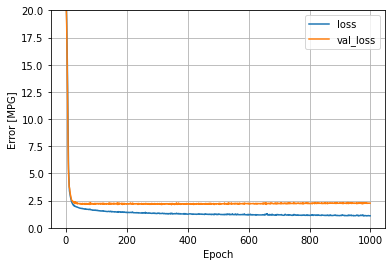

In [ ]:
plot_loss(history)

In [ ]:
test_result['dnn_model'] = dnn_model.evaluate(test_features,
                                               test_labels,
                                               verbose=0)

In [ ]:
pd.DataFrame(test_result, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.650137
linear_mode,2.452594
dnn_horsepower_model,2.933673
dnn_model,1.939292


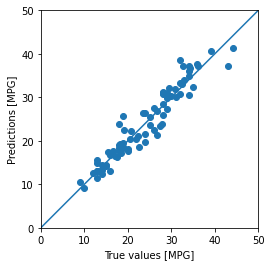

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

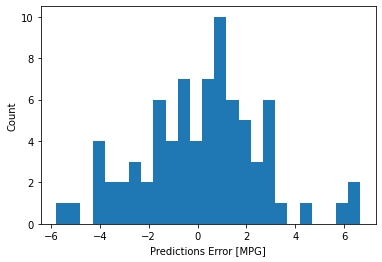

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Predictions Error [MPG]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_result['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0
)

In [ ]:
pd.DataFrame(test_result, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.650137
linear_mode,2.452594
dnn_horsepower_model,2.933673
dnn_model,1.939292
reloaded,1.939292


In [ ]:
normalizer.adapt?

In [ ]:
print(help(tf.lite.TFLiteConverter))

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('dnn_model')
tflite_model = converter.convert()

In [ ]:
with open('model_dnn_regression.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
dnn_model.predict?

In [ ]:
test_features[3:4]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
31,4,113.0,95.0,2228.0,14.0,71,0,1,0


In [ ]:
hey = np.array(test_features[3:4])
hey

array([[   4.,  113.,   95., 2228.,   14.,   71.,    0.,    1.,    0.]])

In [ ]:
heyhey = [[4., 113., 95., 2228., 14., 71., 0., 1., 0.]]
heyhey

[[4.0, 113.0, 95.0, 2228.0, 14.0, 71.0, 0.0, 1.0, 0.0]]

In [ ]:
dnn_model.predict(np.array(heyhey))

array([[25.39]], dtype=float32)

In [ ]:
np.array(test_labels[:10])

array([15., 10.,  9., 25., 19., 14., 14., 13., 18., 35.])